### ANÁLISE DE VENDAS DE CARROS 
O objetivo é gerar gráficos do total de vendas por ano, custo da entrega por fabricante e custo da mão de obra por estado.

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# importando o conjunto de dados
vendas_carros = pd.read_csv("DadosVendaCarros.csv", sep=';')

In [3]:
# visualizando os primeiros registros
vendas_carros.head()

,DataNotaFiscal,Fabricante,Estado,ValorVenda,ValorCusto,TotalDesconto,CustoEntrega,CustoMaoDeObra,NomeCliente,Modelo,Cor,Ano
0,04-10-2016,Rolls Royce,São Paulo,95000,50000,500,750,750,Aldo Motors,Camargue,Vermelho,2016
1,01-01-2016,Aston Martin,São Paulo,120000,75000,0,1500,550,Honest John,DBS,Azul,2016
2,02-02-2016,Rolls Royce,São Paulo,88000,75000,750,1000,550,Bright Orange,Prata Ghost,Verde,2016
3,03-03-2016,Rolls Royce,São Paulo,89000,88000,0,1000,550,Honest John,Prata Ghost,Azul,2016
4,04-04-2016,Rolls Royce,São Paulo,92000,62000,0,1500,550,Wheels'R'Us,Camargue,Prata,2016


In [4]:
# Verificando os tipos de dados de cada atributo
vendas_carros.dtypes

DataNotaFiscal    object
Fabricante        object
Estado            object
ValorVenda         int64
ValorCusto         int64
TotalDesconto     object
CustoEntrega       int64
CustoMaoDeObra     int64
NomeCliente       object
Modelo            object
Cor               object
Ano                int64
dtype: object

In [5]:
# Vamos verificar agora se há algum dado faltante
vendas_carros.isnull().any()

DataNotaFiscal    False
Fabricante        False
Estado            False
ValorVenda        False
ValorCusto        False
TotalDesconto     False
CustoEntrega      False
CustoMaoDeObra    False
NomeCliente       False
Modelo            False
Cor               False
Ano               False
dtype: bool

#### Como está tudo ok, não precisamos tratar os dados, vamos construir os gráficos

### Total de Vendas por Ano

In [6]:
totais = vendas_carros.groupby(by="Ano").sum()
totais

,ValorVenda,ValorCusto,CustoEntrega,CustoMaoDeObra
Ano,,,,
2016,3185500,2152290,33950,30748
2017,7158710,4178575,53890,73655
2018,6386440,4583080,62000,61662
2019,14967290,9495950,90130,144433


In [7]:
venda_ano16 = totais.iloc[0, 0]
venda_ano17 = totais.iloc[1, 0]
venda_ano18 = totais.iloc[2, 0]
venda_ano19 = totais.iloc[3, 0]

<IPython.core.display.Javascript object>


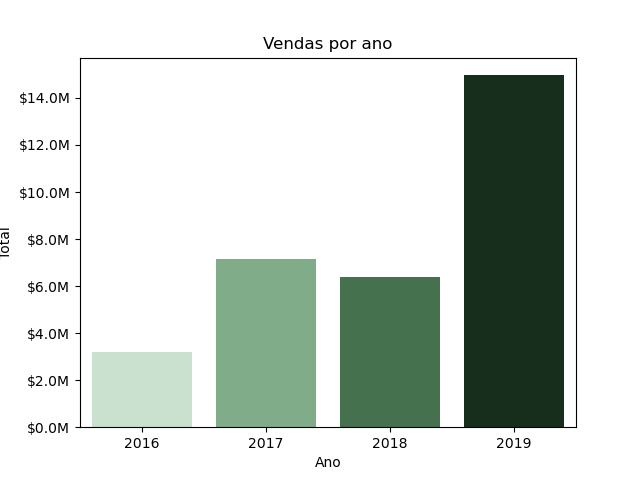

Text(0, 0.5, 'Total')

In [8]:
# Total de venda por ano
# vamos usar a biblioteca seaborn

total_anos = [venda_ano16, venda_ano17, venda_ano18, venda_ano19]

# Definindo o 'ticker' para o eixo y
def milhoes(x, total_anos):
    return '${:1.1f}M'.format(x / 1000000)

# plotando
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(milhoes)
sns.barplot(data = totais, x = totais.index, y = total_anos, palette = 'ch:start=2, rot=0')
plt.title("Vendas por ano")
plt.ylabel('Total')

### Custo da Entrega por Fabricante

In [9]:
custo_entrega_fabricante = vendas_carros.groupby(by='Fabricante').sum()

custo_entrega_fabricante

,ValorVenda,ValorCusto,CustoEntrega,CustoMaoDeObra,Ano
Fabricante,,,,,
Aston Martin,10686040,6704770,87450,97585,221985
Bentley,4951250,3148700,39350,62736,143267
Jaguar,6319000,4899700,46525,74082,260329
MGB,1011000,342000,550,11700,72660
Rolls Royce,7356900,4116225,63520,48420,127140
TVR,498750,570000,175,4550,28256
Triumph,875000,628500,2400,11425,68622


<IPython.core.display.Javascript object>


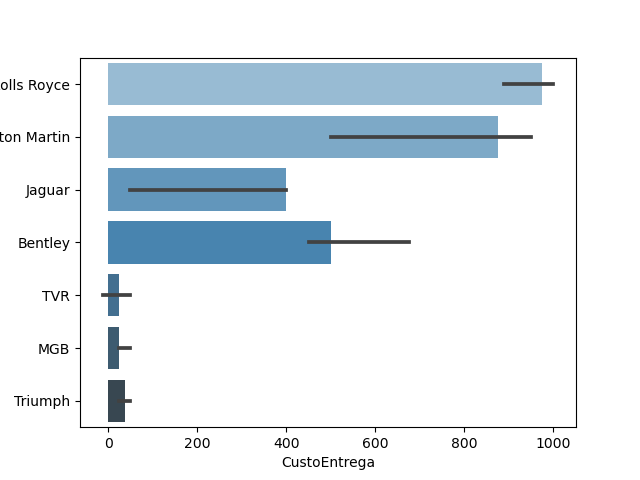

<AxesSubplot:xlabel='CustoEntrega', ylabel='Fabricante'>

In [10]:
fabricantes = vendas_carros['Fabricante']
custo_entrega = vendas_carros['CustoEntrega']
plt.close()
from numpy import median
sns.barplot(data=vendas_carros, x = custo_entrega, y = fabricantes, estimator = median, palette = 'Blues_d')

### Custo da Mão de Obra por Estado

In [61]:
df = vendas_carros[['Estado', 'CustoMaoDeObra']]
df

,Estado,CustoMaoDeObra
0,São Paulo,750
1,São Paulo,550
2,São Paulo,550
3,São Paulo,550
4,São Paulo,550
...,...,...
452,Rio de Janeiro,1250
453,Rio de Janeiro,1250
454,Rio de Janeiro,950
455,Rio de Janeiro,1250


In [117]:
estados = df['Estado'].unique()
estados

array(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espírito Santo',
       'Paraná', 'Bahia'], dtype=object)

In [122]:
custo_mod = [
vendas_agrupado['São Paulo'],
vendas_agrupado['Minas Gerais'],
vendas_agrupado['Rio de Janeiro'],
vendas_agrupado['Espírito Santo'],
vendas_agrupado['Paraná'],
vendas_agrupado['Bahia'],]


<IPython.core.display.Javascript object>


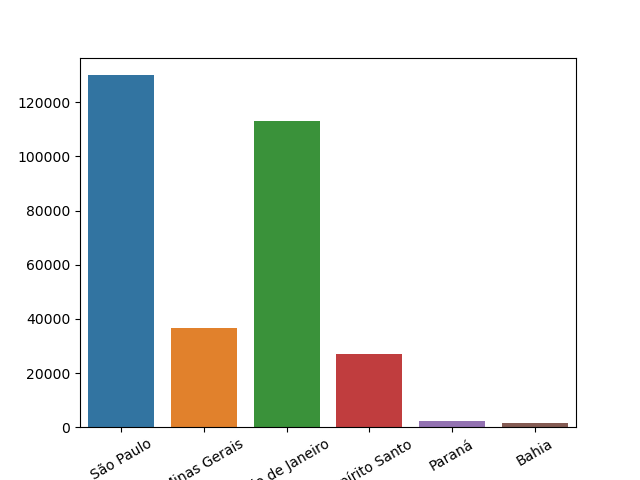

In [123]:
plt.close()
fig, ax = plt.subplots()

ax = sns.barplot(x = estados, y = custo_mod, data = df)
ax.tick_params(axis='x', rotation = 30)
plt.show()
